# Aufgabe 2: Regression einer beliebigen Funktion

Deine Aufgabe ist es ein neuronales Netz zu bauen, dass eine von Dir definierte mathematische Funktion lernt.
Dein Netz soll als Input einen X-Wert bekommen und dazu den Y-Wert der gelernten mathematischen Funktion berechnen.

### Hinweis
Optimiere das Lernen (`model.fit`) durch das Setzen des Parameters `batch_size` auf die Anzahl der X-Werte.
Damit jupyter notebook sich beim Lernen nicht aufhängt, setze auch zusätzlich den Paramter `verbose=0`.

### Importiere Bibliotheken

In [26]:
# Plots sollen inline im notebook angezeigt werden
# %matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

#### Definiere Eingabe und erwartete Ausgabe

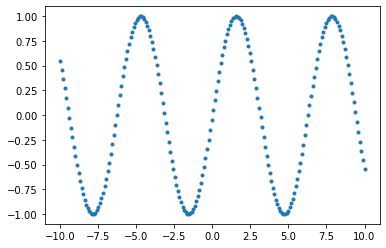

In [27]:
# Definiere beliebige Funktion im Bereich zwischen -1 < x < 1 und 0 < y < 1

m = 200  # Anzahl der Stützpunkte
n = 20 # Grad des Polynoms

X = torch.linspace(-10, 10, steps=m, dtype=torch.float)
# f = lambda x: x**2
f = torch.sin
Y = f(X)

plt.plot(X, Y, '.')
plt.show()

# Falls Du die Bitcoin-Kurse als Funktion haben möchtest, dann kommentier die nächste Zeile ein.
# X, Y = codefestutils.GetBitcoinIndex()

#### Berechne w direkt und vergleiche

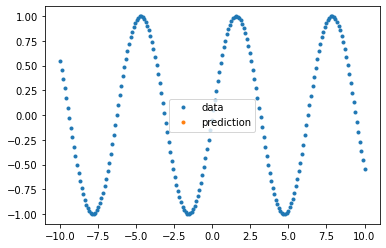

In [28]:
aux = [X.pow(k)  for k in range(n + 1)]
XX = torch.cat(aux, 0).reshape(n + 1, m).t()   # shape = m x (n+1)
YY = Y.reshape(m, 1)      # shape = m x 1

u = YY.t().mm(XX)
v = XX.t().mm(XX).inverse()
w = u.mm(v)
YY_test = XX.mm(w.t())

plt.plot(XX[:, 1], YY[:, 0], '.', XX[:, 1], YY_test[:, 0], '.')
plt.legend(['data', 'prediction'], loc='best')
plt.show()

#### Definiere das Modell

In [29]:
G = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())
optimizer = optim.SGD(G.parameters(), lr=0.001)
loss = nn.MSELoss()

#### Suche die Lösung

In [30]:
cnt = 0
history = []

X1 = X.reshape(m, 1)
Y1 = Y.reshape(m, 1)

while cnt < 101:
    currentLoss = loss(G(X1), Y1)
    if cnt % 10 == 0:
        history.append(currentLoss.item())
    currentLoss.backward()
    optimizer.step()
    optimizer.zero_grad()
    cnt += 1

### Testphase

tensor([-10.0000,  -9.8995,  -9.7990,  -9.6985,  -9.5980,  -9.4975,  -9.3970,
         -9.2965,  -9.1960,  -9.0955,  -8.9950,  -8.8945,  -8.7940,  -8.6935,
         -8.5930,  -8.4925,  -8.3920,  -8.2915,  -8.1910,  -8.0905,  -7.9900,
         -7.8894,  -7.7889,  -7.6884,  -7.5879,  -7.4874,  -7.3869,  -7.2864,
         -7.1859,  -7.0854,  -6.9849,  -6.8844,  -6.7839,  -6.6834,  -6.5829,
         -6.4824,  -6.3819,  -6.2814,  -6.1809,  -6.0804,  -5.9799,  -5.8794,
         -5.7789,  -5.6784,  -5.5779,  -5.4774,  -5.3769,  -5.2764,  -5.1759,
         -5.0754,  -4.9749,  -4.8744,  -4.7739,  -4.6734,  -4.5729,  -4.4724,
         -4.3719,  -4.2714,  -4.1709,  -4.0704,  -3.9698,  -3.8693,  -3.7688,
         -3.6683,  -3.5678,  -3.4673,  -3.3668,  -3.2663,  -3.1658,  -3.0653,
         -2.9648,  -2.8643,  -2.7638,  -2.6633,  -2.5628,  -2.4623,  -2.3618,
         -2.2613,  -2.1608,  -2.0603,  -1.9598,  -1.8593,  -1.7588,  -1.6583,
         -1.5578,  -1.4573,  -1.3568,  -1.2563,  -1.1558,  -1.05

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

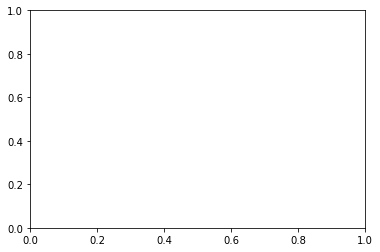

In [31]:
Y_test = G(X1)

print(X1[:, 0])
print(Y_test[:, 0])

plt.plot(X, Y, '.', list(X1[:, 0]), list(Y_test[:, 0]), '.')
plt.legend(['data', 'prediction'], loc='best')
plt.show()

### Fehlerfunktion

In [ ]:
# history output
plt.plot(history, label='training loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()